In [22]:
from __future__ import division
from pyomo.environ import *

from pyomo.opt import SolverFactory
import matplotlib.pyplot as plt

## Data de entrada

In [23]:
Model = ConcreteModel()
numTrabajos = 5
numEmpleados = 3

p = RangeSet(1, numTrabajos)
j = RangeSet(1, numEmpleados)

horasEmpleados = {1:8, 2:10, 3:6}
gananciaTrabajo = {1:50, 2:60, 3:40, 4:70, 5:30}
horasTrabajo = {1:4, 2:5, 3:3, 4:6, 5:2}

## Variable de decision

In [24]:
Model.x = Var(p, j, domain=Binary)

## Modelo matematico


- **Conjuntos:** 
  - T: el conjunto de trabajos
  - \( E \): el conjunto de empleados

- **Índices:** 
  - Se usará el índice \( t \) para indexar cada elemento del conjunto \( T \).
  - Se usará el índice \( e \) para indexar cada elemento del conjunto \( E \).

- **Parámetros:**
  - \( h_e \): las horas disponibles para el empleado \( e \)
  - \( g_t \): la ganancia por realizar el trabajo \( t \)
  - \( d_t \): las horas necesarias para completar el trabajo \( t \)

- **Variable de Decisión (la incógnita):** 
  - Se propone una \( x_{t,e} \) binaria. \( x_{t,e} = 1 \) indica que el trabajo \( t \) es asignado al empleado \( e \), \( 0 \) si no lo es.

- **Función objetivo:**

$$
\text{Maximizar: } \sum_{t \in T} \sum_{e \in E} g_t \cdot x_{t,e}
$$




In [25]:
Model.obj = Objective(expr = sum(Model.x[tb,ep]*gananciaTrabajo[tb] for tb in p for ep in j), sense=maximize)

## Restricciones


1. **Restricción de horas disponibles:**

$$
\sum_{t \in T} d_t \cdot x_{t,e} \leq h_e \quad \forall e \in E
$$


2. **Restricción de asignación única:**

$$
\sum_{e \in E} x_{t,e} \leq 1 \quad \forall t \in T
$$


In [26]:
Model.tiempo_empleado = ConstraintList()
Model.trabajoUsado = ConstraintList()

# Restriccion de horas de trabajo
for ep in j:
    Model.tiempo_empleado.add(expr = sum(Model.x[tb, ep]*horasTrabajo[tb] for tb in p) <= horasEmpleados[ep])

# Restriccion para que cada trabajo se asigne maximo una vez
for tb in p:
    Model.trabajoUsado.add(expr = sum(Model.x[tb, ep] for ep in j) <= 1)

## Solver

In [27]:
SolverFactory('glpk').solve(Model)

{'Problem': [{'Name': 'unknown', 'Lower bound': 250.0, 'Upper bound': 250.0, 'Number of objectives': 1, 'Number of constraints': 8, 'Number of variables': 15, 'Number of nonzeros': 30, 'Sense': 'maximize'}], 'Solver': [{'Status': 'ok', 'Termination condition': 'optimal', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': '7', 'Number of created subproblems': '7'}}, 'Error rc': 0, 'Time': 0.0038199424743652344}], 'Solution': [OrderedDict({'number of solutions': 0, 'number of solutions displayed': 0})]}

## Presentacion de informacion

Model unknown

  Variables:
    x : Size=15, Index=[1:5]*[1:3]
        Key    : Lower : Value : Upper : Fixed : Stale : Domain
        (1, 1) :     0 :   1.0 :     1 : False : False : Binary
        (1, 2) :     0 :   0.0 :     1 : False : False : Binary
        (1, 3) :     0 :   0.0 :     1 : False : False : Binary
        (2, 1) :     0 :   0.0 :     1 : False : False : Binary
        (2, 2) :     0 :   1.0 :     1 : False : False : Binary
        (2, 3) :     0 :   0.0 :     1 : False : False : Binary
        (3, 1) :     0 :   0.0 :     1 : False : False : Binary
        (3, 2) :     0 :   1.0 :     1 : False : False : Binary
        (3, 3) :     0 :   0.0 :     1 : False : False : Binary
        (4, 1) :     0 :   0.0 :     1 : False : False : Binary
        (4, 2) :     0 :   0.0 :     1 : False : False : Binary
        (4, 3) :     0 :   1.0 :     1 : False : False : Binary
        (5, 1) :     0 :   1.0 :     1 : False : False : Binary
        (5, 2) :     0 :   0.0 :     1 : 

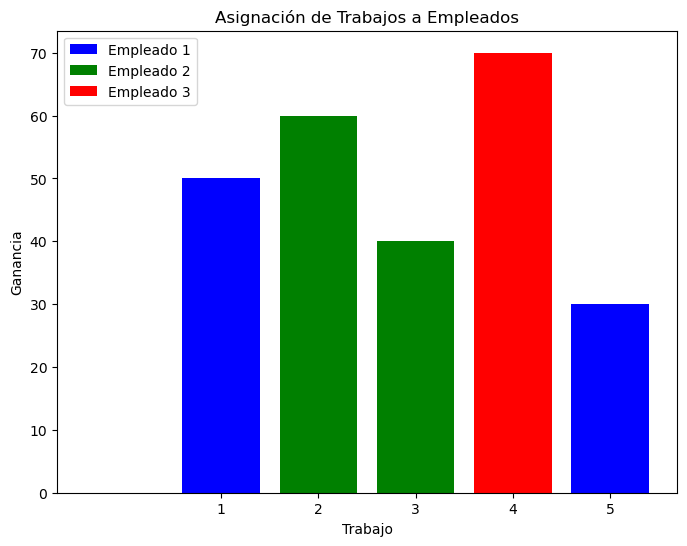

In [28]:
Model.display()

# Presentar la información de asignacion

trabajos, ganancias, colores = [], [], []


color_map = {1: 'blue', 2: 'green', 3: 'red'}

for tb in p:
    for ep in j:
        if Model.x[tb, ep].value == 1:
            trabajos.append(tb)
            ganancias.append(gananciaTrabajo[tb])
            colores.append(color_map[ep])

plt.figure(figsize=(8, 6))
bars = plt.bar(trabajos, ganancias, color=colores)

for ep in j:
    plt.bar(0, 0, color=color_map[ep], label=f'Empleado {ep}')
plt.legend()

plt.xlabel('Trabajo')
plt.ylabel('Ganancia')
plt.title('Asignación de Trabajos a Empleados')
plt.xticks(trabajos)

plt.show()
